## Making inferences using a model

##### * model_uri – URI to the model. A local path, a ‘runs:/’ URI, or a remote storage URI (e.g., an ‘s3://’ URI). For more information about supported remote URIs for model artifacts, see https://mlflow.org/docs/latest/tracking.html#artifact-stores

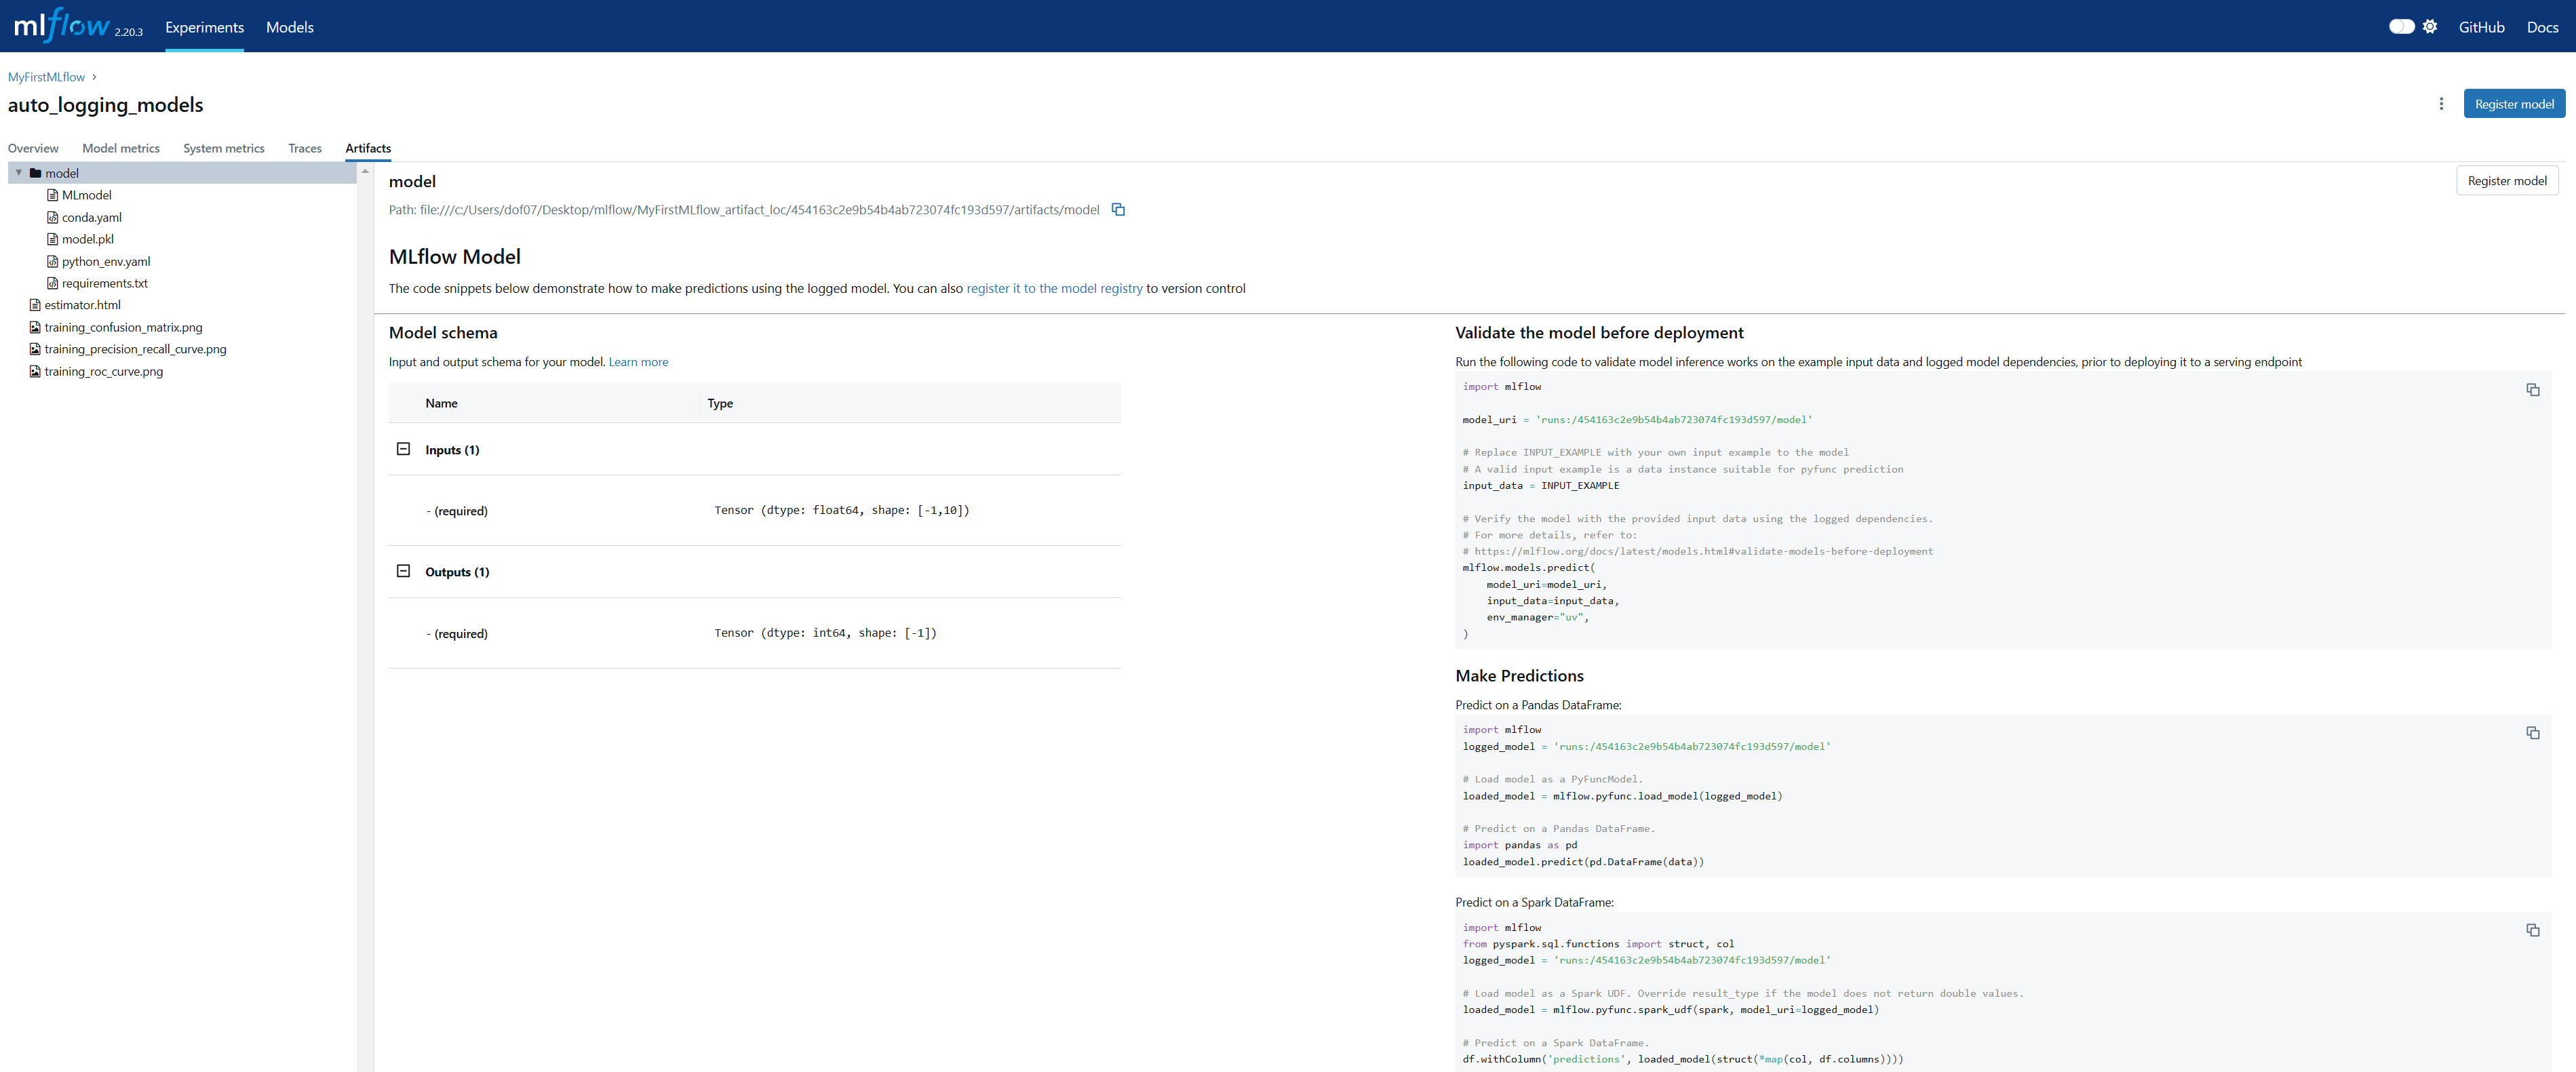

#### Here, we use the model created from the past run; auto_logging_models
#### In Artifacts section, It is explained how to load the model and make predictions.

In [3]:
import mlflow
from mlflow.models import infer_signature
from mlflow_utils import get_mlflow_experiment


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import pandas as pd 

if __name__=="__main__":

    run_id = "454163c2e9b54b4ab723074fc193d597"
        
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
    X = pd.DataFrame(X, columns=["feature_{}".format(i) for i in range(10)])
    y = pd.DataFrame(y, columns=["target"])

    _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

    # load model
    # model_uri = f'runs:/{run_id}/random_forest_classifier'
    model_uri = f"file:///c:/Users/dof07/Desktop/mlflow/MyFirstMLflow_artifact_loc/{run_id}/artifacts/model"
    rfc = mlflow.sklearn.load_model(model_uri=model_uri)

    y_pred = rfc.predict(X_test)
    y_pred = pd.DataFrame(y_pred, columns=["prediction"])

    print(y_pred.head())


   prediction
0           0
1           0
2           0
3           1
4           0


c:\Users\dof07\anaconda3\envs\mlflow\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
